# GRIP: The Sparks Foundation

# # <font color=green><u>Data Science and Bisness Analytics Intern

# Author-Dipankar Santra

#  # <font color=green><u>Task #2: Prediction using Supervised ML

In this task we have to from the given "Iris" dataset,predict the optimum  number of clusters and rerpresent it visually.The task has four variable where the features sepal length (cm),sepal width (cm),petal length (cm),petal width (cm).This can be solved using K-Means Clustering Models.

# Steps1-Importing the requre libary and data. 

In [54]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)


# Steps2-visualizing dataset.

In [64]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [65]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [23]:
df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [24]:
df.shape

(150, 4)

In [25]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Steps3-Data prepration.

In [2]:
df.isnull().sum() 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
print(df.head())
print(df.tail())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


# Step-4-chake the outlier and removing them

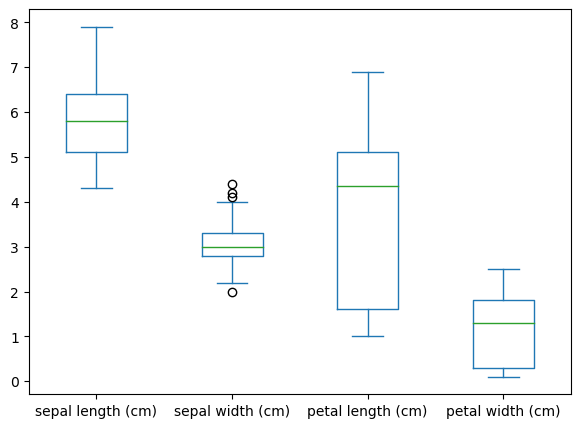

In [70]:
#checking for outliers by boxplot
plt.rcParams["figure.figsize"]=(7,5)
df.plot(kind="box")
plt.show()

In [14]:
#removing the ouliers using IQR method
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

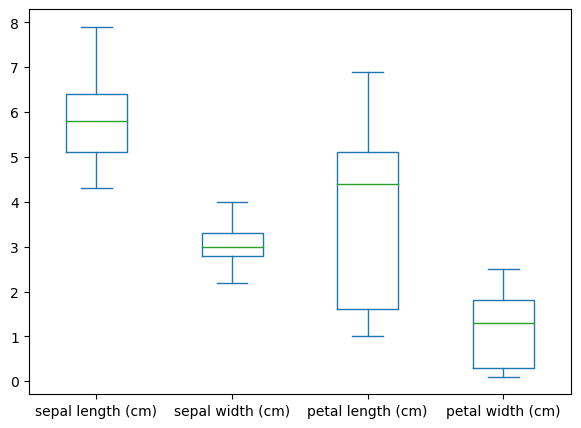

In [15]:
plt.rcParams["figure.figsize"]=(7,5)
df.plot(kind="box")
plt.show()

# Steps4-Train the algorithum.

In [16]:
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance.
from sklearn.cluster import KMeans   #Clustering models aim to group data into distinct “clusters” or groups
from sklearn.metrics import silhouette_score

## K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.<br>

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.


## Optimal value of k using Elbow plot

In [56]:
x=df.iloc[:,[0,1,2,3]].values #data arrangement

In [45]:
from sklearn.cluster import KMeans
#create several cluster combinations and observe the wcss(Within Cluster Sum of Squares)
wcss=[] #empty list to store the wcss
K=range(1,11)
for i in K:
    kmeans=KMeans(n_clusters=i,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
    kmeans=kmeans.fit(x)  #fit the model on prepared data
    wcss.append(kmeans.inertia_) #returns wcss for specific value of k
wcss  

[655.6012328767122,
 143.891875,
 73.47869237971103,
 53.267005466903065,
 42.51076241134752,
 36.59785757575758,
 31.831534343434342,
 28.425595670995673,
 26.522378697910277,
 25.122909571909574]

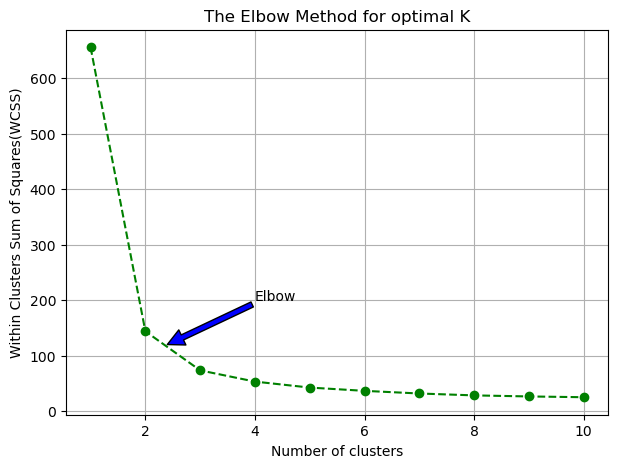

In [71]:
#visualize the elbow plot to find the optimal value of k
plt.plot(K,wcss,"go--")
#setting the plot title and axis labels
plt.title("The Elbow Method for optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Within Clusters Sum of Squares(WCSS)")
plt.annotate("Elbow",xytext=(4,200),xy=(2.4,120),arrowprops={"facecolor":"blue"})
plt.grid()
plt.show()#display the plot

# Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [59]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6810461692117462
For n_clusters=3, the silhouette score is 0.5528190123564095
For n_clusters=4, the silhouette score is 0.49805050499728737
For n_clusters=5, the silhouette score is 0.48874888709310566
For n_clusters=6, the silhouette score is 0.36483400396700255
For n_clusters=7, the silhouette score is 0.3566882476581695
For n_clusters=8, the silhouette score is 0.3617900335973811


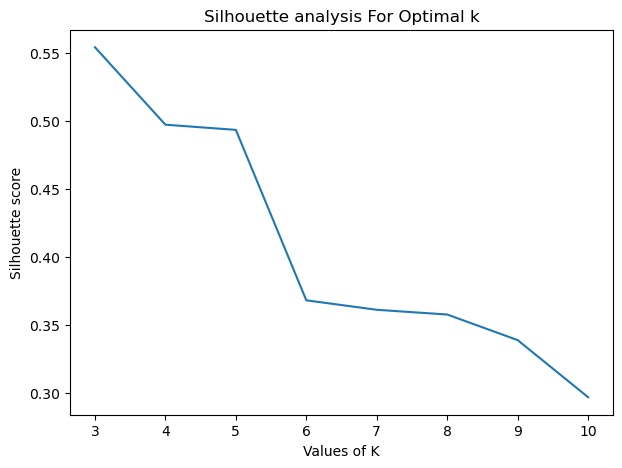

In [68]:
#plotting the silhouette score
plt.plot(range(3,11),s)
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [69]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df)

KMeans(max_iter=50, n_clusters=3)

# Steps5-visualizing the model.

In [63]:
# Creating the kmeans classifier
kmeans=KMeans(n_clusters=3,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)   

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

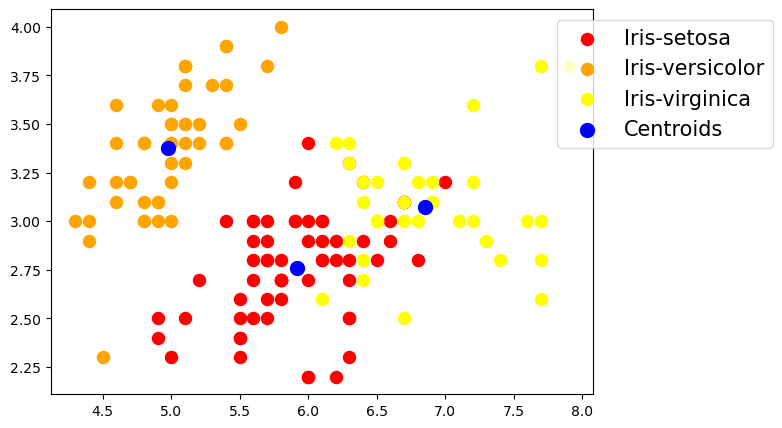

In [52]:
#Visualizing the clusters for the first two columns of the data
plt.scatter(x[ y_kmeans==0,0],x[ y_kmeans==0,1],s=75,c="red",label="Iris-setosa")
plt.scatter(x[ y_kmeans==1,0],x[ y_kmeans==1,1],s=75,c="orange",label="Iris-versicolor")
plt.scatter(x[ y_kmeans==2,0],x[ y_kmeans==2,1],s=75,c="yellow",label="Iris-virginica")
#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="blue",label="Centroids")
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})
plt.show()

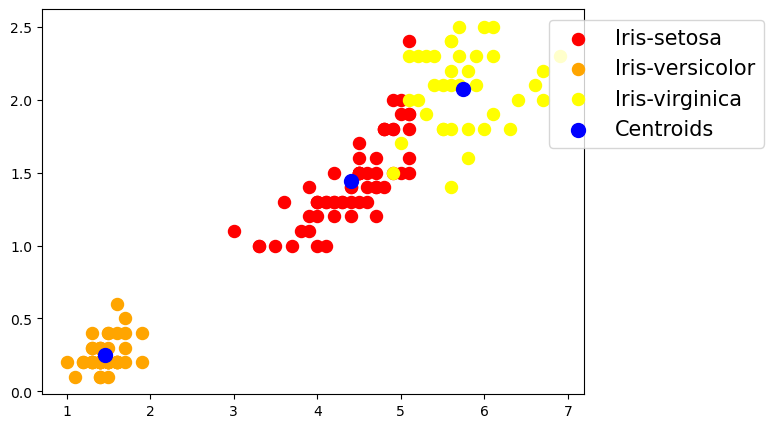

In [53]:
#Visualizing the clusters for the 3rd and 4th columns of the data
plt.scatter(x[ y_kmeans==0,2],x[ y_kmeans==0,3],s=75,c="red",label="Iris-setosa")
plt.scatter(x[ y_kmeans==1,2],x[ y_kmeans==1,3],s=75,c="orange",label="Iris-versicolor")
plt.scatter(x[ y_kmeans==2,2],x[ y_kmeans==2,3],s=75,c="yellow",label="Iris-virginica")
#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100,c="blue",label="Centroids")
plt.legend(loc=1,bbox_to_anchor=(1.35,1),prop={"size":15})
plt.show()